# データを補間したい（``scipy.interpolate``）

## 1. 線形補間（Linear Interpolation）

:特性:
最も単純な補間手法で、隣接するデータ点を直線で結び、その間の値を推定する

:適用シーン:
データが滑らかで単調な場合や、補間が小さい範囲で必要な場合。計算が非常に高速で、データが比較的少ない場合に有効。

:利点:
シンプルで高速。

:欠点:
データが非線形に変化する場合には不正確

## 2. スプライン補間（Spline Interpolation）

:特性:
データ点間を滑らかに接続する曲線（スプライン）を用いた補間手法。
とくに、**三次スプライン（Cubic Spline）**がよく使われる（らしい）。
三次スプラインは、各区間が三次関数で構成され、全体として滑らかな曲線になる。

:適用シーン:
データが滑らかに変化し、ノイズが少ない場合。
とくに、信号処理や時間シリーズデータの補間によく使用される。

:利点:
滑らかな補間が可能。データの自然な変化をよく再現できる。

:欠点:
高次のスプラインを用いると、過剰適合（オーバーフィッティング）のリスクが増すことがある。

## 3. 多項式補間（Polynomial Interpolation）

:特性:
データセット全体を単一の多項式で補間する方法。
ラグランジュ補間やニュートン補間が有名。

:適用シーン:
少数のデータ点に対して使用する場合。
データが滑らかでない場合には注意が必要。

:利点:
小さなデータセットに対して適用するときには非常に精度が高くなる。

:欠点:
多くのデータ点を使用する場合、ランゲ現象（端での振動が大きくなる現象）が発生しやすくなり、適用が難しくなることがある。

## 4. 分段線形補間（Piecewise Linear Interpolation）

:特性:
複数の線形セグメントを連結して補間する手法。
区間ごとに線形関数で補間を行う。

:適用シーン:
データが多いが、それほど滑らかである必要がない場合。

:利点:
計算が高速で、全体的に安定。

:欠点:
曲線部分が不足しているため、滑らかさが犠牲になることがある。

## 5. 正弦補間（Sinc Interpolation）

:特性:
周波数領域で考慮される理想的な補間手法。
とくにバンドリミット信号（サンプリング定理に従う信号）に適している。

:適用シーン:
信号処理。
とくにデジタル信号の再構成に適している。

:利点:
理想的な周波数特性を持ち、バンドリミット信号に対しては非常に高精度。

:欠点:
計算量が多く、ノイズがあると不正確な結果になることがある。

## 6. 移動平均補間（Moving Average Interpolation）

:特性:
近傍のデータ点の平均を取って補間する手法。
スムージング効果がある。

:適用シーン:
ノイズが多いデータや、滑らかさが重要な場合。

:利点:
データの変動を抑え、平滑に補間できる。

:欠点:
急激な変動があるデータでは、元の形状が失われることがある。

# 3次スプライン補間

- 宇宙線の信号には3次スプライン補間が適しているらしい
- 3次スプライン補間は、分割定義された3次多項式の補間関数で補間する形式
- 関数全体がなめらかで連続的になるように、データ点ごとの補間関数を構成することが必要

## フィット関数

A cubic spline is composed of several cubic polynomials, each defined on a subinterval between two data points 

### データ区間 

```math
[x_{i}, x_{i+1}]
```

### 3次スプライン関数

```math
S_{i} (x) = a_{i} + b_{i} (x - x_{i}) + c_{i} (x - x_{i})^{2} + d_{3} (x - x_{i})^{3}
```

$a_{i}, b_{i}, c_{i}, d_{i}$ はそれぞれのデータ区間の係数


# コードサンプル

- `scipy.interpolate`を使ったサンプル
- https://docs.scipy.org/doc/scipy/reference/generated/scipy.interpolate.CubicSpline.html

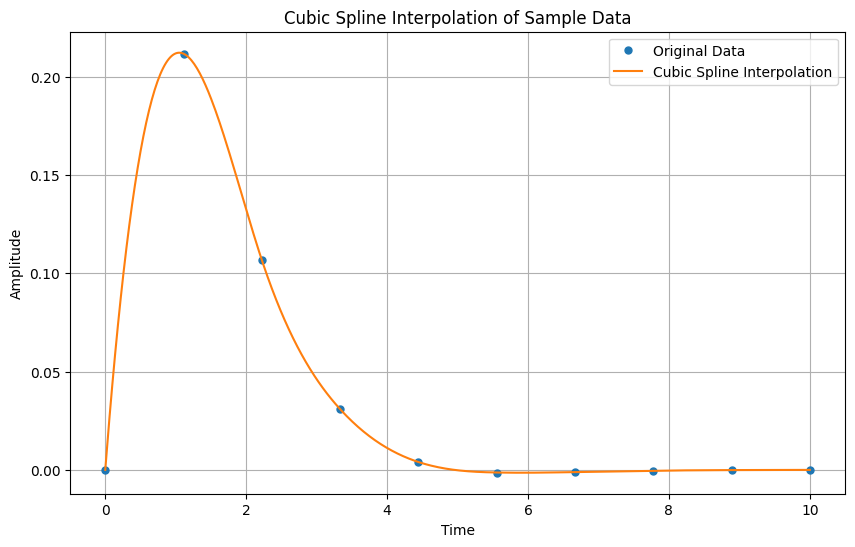

In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.interpolate import CubicSpline
import hvplot.pandas

# サンプルデータの生成
# サンプリングされた時系列データを模擬
time = np.linspace(0, 10, 10)  # 10点のサンプルデータ
amplitude = np.exp(-time) * np.sin(2 * np.pi * time)

# Pandas DataFrameにデータを格納
df = pd.DataFrame({"time": time, "amplitude": amplitude})

# 三次スプライン補間を実行
cs = CubicSpline(df["time"], df["amplitude"])

# 補間後のデータを生成
time_new = np.linspace(0, 10, 500)  # より細かい時間軸に補間
amplitude_new = cs(time_new)

# 元のデータと補間後のデータをプロット
plt.figure(figsize=(10, 6))
plt.plot(df["time"], df["amplitude"], "o", label="Original Data", markersize=5)
plt.plot(time_new, amplitude_new, "-", label="Cubic Spline Interpolation")
plt.xlabel("Time")
plt.ylabel("Amplitude")
plt.legend()
plt.title("Cubic Spline Interpolation of Sample Data")
plt.grid(True)
plt.show()


## 要素を分割

In [56]:
# 宇宙線の信号を模した波形を作成
# np.linspace(start, stop, num)

time = np.linspace(0, 10, 10)  # 10点のサンプルデータ
amplitude = np.exp(-time) * np.sin(2 * np.pi * time)
data = pd.DataFrame({"time": time, "amplitude": amplitude})

data.hvplot.scatter(x="time", y="amplitude")


:Scatter   [time]   (amplitude)

In [57]:
# 三次スプライン補間を実行
# CubicSpline(x, y) -> CubicSpline
cs = CubicSpline(data["time"], data["amplitude"])


- ドキュメントには明記されていないけれど、CubicSplineオブジェクトの中には、それぞれの区間の補間関数がある
  - ``cs.c``の中に4つのリストがある -> $a, b, c, d$ に相当
  - それらは、それぞれ10点ある -> $a_i, b_i, c_i, d_i$ に相当

In [58]:
# 補間関数の係数（a_i, b_i, c_i, d_i）の二次元配列（numpy.ndarray）
# cs.c
cs.x  # x
cs.axis  # 0
cs.extrapolate  # True

# cs.antiderivative() -> CubicSpline
# cs.derivative() -> CubicSpline
# cs.from_bernstein_basis() -> CubicSpline
# cs.from_spline() -> CubicSpline
# cs.integrate() -> float
# cs.roots() -> numpy.ndarray
# cs.solve() -> numpy.ndarray


True

In [59]:
# 補間後のデータを生成
time_new = np.linspace(0, 10, 500)  # より細かい時間軸に補間
amplitude_new = cs(time_new)
splined = pd.DataFrame({"time": time_new, "amplitude": amplitude_new})

splined.hvplot.line(x="time", y="amplitude")


:Curve   [time]   (amplitude)

In [68]:
(
    splined.hvplot.line(x="time", y="amplitude", grid=True, width=600, height=400)
    * data.hvplot.scatter(x="time", y="amplitude", grid=True, color="red")
)


:Overlay
   .Curve.I   :Curve   [time]   (amplitude)
   .Scatter.I :Scatter   [time]   (amplitude)

# スプライン補間の精度を評価する

スプライン補間の精度を評価するには、
補間結果を既知の値（＝真の値）と比較するか、
スプラインがデータにどの程度フィットするかをさまざまな基準に従って評価する必要がある

## 1. ビジュアルチェック

スプラインを元のデータと一緒にプロットし、視覚的に不一致がないか確認する

- スプラインとデータ点をプロット： スプラインがどの程度データの形状に沿っているかを比較する
- 振動をチェック： 特にデータ点の少ない領域や境界で、スプラインに非現実的な振動が生じないことを確認する


## 2. 残差分析

元のデータポイントと、そのポイントでのスプラインによって予測された値との差（残差）を確認する。
残差が小さいほど、より正確なスプラインであることを示す。

1. 残差を計算する
2. 残差をプロットする: 適切にフィットできていれば0周辺にランダム分布するはず
3. RMSE（Root Mean Square Error）を計算する


```math
R_{i} = y_{i} − \hat{y}_{i}​
```

$y_{i}$は実データ、$\hat{y}_{i}$はスプライン補間したでデータ


RMSE= 
n
1
​
  
i=1
∑
n
​
 Residual 
i
2


​
 
​
 
RMSE provides a single number summarizing the average size of the residuals.

1. Cross-Validation
If you have a limited dataset, cross-validation can be a powerful method to assess the spline’s performance. The idea is to fit the spline on a subset of the data (training set) and evaluate its performance on another subset (validation set).

Leave-One-Out Cross-Validation (LOOCV):
For each data point, leave it out of the fitting process, fit the spline to the remaining data, and then evaluate how well the spline predicts the left-out point.
Compute the error for each left-out point and summarize them (e.g., with RMSE).
k-Fold Cross-Validation:
Divide the data into 
𝑘
k subsets.
For each subset, fit the spline on the remaining 
𝑘
−
1
k−1 subsets and validate it on the left-out subset.
Average the errors across all folds.
4. Comparison with Known Analytical Solutions
If the underlying function that generated the data is known, you can compare the spline to this known function.

Generate a high-resolution set of data points from the known function.
Evaluate the spline at these points and compare the results.
Calculate errors such as RMSE, mean absolute error (MAE), or maximum absolute error.
5. Spline Smoothness and Overfitting Check
Check second derivatives: A very smooth spline should have reasonably smooth second derivatives. You can compute and plot the second derivatives to ensure the spline isn't too wavy.
Overfitting detection: Overfitting occurs when the spline fits the noise in the data rather than the underlying trend. If the spline is too complex (e.g., if you use too many data points or the boundary conditions are too strict), it might follow every little fluctuation in the data. Regularization or a simpler spline might be necessary to avoid overfitting.

In [75]:
data
splined


,time,amplitude
0,0.00000,0.000000e+00
1,0.02004,9.130109e-03
2,0.04008,1.802016e-02
3,0.06012,2.667267e-02
4,0.08016,3.509016e-02
...,...,...
495,9.91984,-4.566066e-06
496,9.93988,-3.441121e-06
497,9.95992,-2.306228e-06
498,9.97996,-1.159737e-06
